In [9]:
import numpy as np

def mean_squared_error(y, t):
  return 0.5 * np.sum((y - t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [10]:
import numpy as np

def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [11]:
import sys, os
sys.path.append('../deep-learning-from-scratch-master')
from dataset.mnist import load_mnist
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(np.random.choice(60000, 10))

[27289  6636 58582 12583 56863 50589 53986 58395 20133 45139]


In [13]:
import numpy as np

def cross_entropy_error(y, t):
  delta = 1e-7

  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + delta)) / batch_size


In [14]:
def cross_entropy_error(y, t):
  delta = 1e-7

  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + delta)) / batch_size



In [15]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [16]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

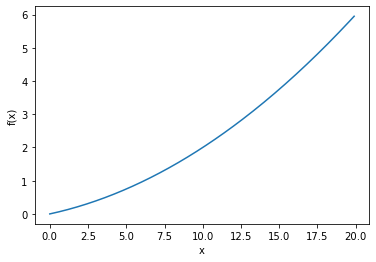

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [19]:
def function_2(x):
  return x[0]**2 + x[1]**2
  # return np.sum(x**2)

In [20]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

In [21]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [22]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x

In [23]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [24]:
import sys, os
sys.path.append('../deep-learning-from-scratch-master')
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [25]:
net = simpleNet()
print(net.W)
print("\n")

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
print("\n")


t = np.array([0, 0, 1])
print(net.loss(x, t))

[[-0.56498585  0.91181262 -0.17177527]
 [-1.57424301  2.04820881  0.95988094]]


[-1.75581022  2.3904755   0.76082768]
1


1.8217719408302584


In [26]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

# f = lambda w: net.loss(x, t)
# dW = numerical_gradient(f, net.W)
# print(dW)

[[ 0.00783436  0.49512205 -0.50295641]
 [ 0.01175153  0.74268308 -0.75443461]]


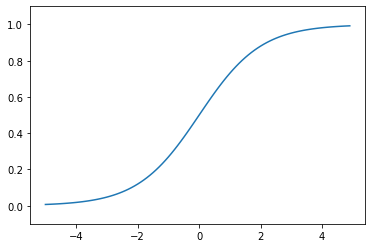

In [29]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [33]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # オーバーフロー対策
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [34]:
# 2層ニューラルネットワーク

import sys, os
sys.path.append('../deep-learning-from-scratch-master')
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
  

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)
  

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}

    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads


In [36]:
import numpy as np
sys.path.append('../deep-learning-from-scratch-master')
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):

  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)


if i % iter_per_epoch == 0:
  train_acc = network.accuracy(x_train, t_train)
  test_acc = network.accuracy(x_test, t_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)
  print("train acc, test acc | " + str(train_acc) + "," + str(test_acc))

KeyboardInterrupt: 